In [4]:
import os
import cv2
import random
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from losses import *

In [5]:
# loading a model with custom scopes
with tf.keras.utils.custom_object_scope({'focal_loss': focal_loss, 'dice_score': dice_score}):
    main_model = tf.keras.models.load_model('model_main.h5')

In [6]:
# loading a model with custom scopes
with tf.keras.utils.custom_object_scope({'focal_loss': focal_loss, 'dice_score': dice_score}):
    our_model = tf.keras.models.load_model('model_our.h5')

In [14]:
images_path = "images_test/"

In [15]:
images = os.listdir(images_path)
images

['deaae0cdd.jpg',
 'eeb350e14.jpg',
 'f02ab3740.jpg',
 'f0feb922c.jpg',
 'f2523039a.jpg',
 'f258c6fac.jpg',
 'f285df57d.jpg',
 'f42b7eaa7.jpg',
 'f44feff9f.jpg',
 'f4d5827eb.jpg',
 'f6e23fef9.jpg',
 'f8700c826.jpg',
 'fc59f6400.jpg',
 'fc892058a.jpg',
 'fe3d5dbd9.jpg',
 'ffb181e52.jpg']

In [22]:
IMG_SCALING = (3, 3)
COLORS = [
    (0, 150, 255),
    (0, 180, 255),
    (0, 200, 255),
    (0, 220, 255),
    (0, 240, 255),
    (0, 255, 240),
    (0, 255, 220),
    (0, 255, 200),
    (0, 255, 180),
    (0, 255, 150),
]
def gen_pred(img, model):
    rgb_path = os.path.join(images_path,img)
    img = cv2.imread(rgb_path)
    img = cv2.resize(img, (768, 768))
    img = img[::IMG_SCALING[0], ::IMG_SCALING[1]]
    img = img / 255
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    pred = np.squeeze(pred, axis=0)
    return Image.open(rgb_path), cv2.resize(pred, (768, 768))

In [23]:
def segmentation(img, pred, alpha=0.5):
    segmented_img = np.copy(img)
    threshold = 0.3

    labels = cv2.connectedComponentsWithStats(np.uint8(pred > threshold))[1]

    for label in range(1, labels.max() + 1):
        mask = labels == label
        if label < len(COLORS) + 1:
            color = COLORS[label - 1]
            segmented_img[mask] = color

    img_array = np.array(img)
    segmented_img = cv2.addWeighted(img_array, 1 - alpha, segmented_img, alpha, 0)

    return segmented_img

1/1 [==============================] - 0s 44ms/step


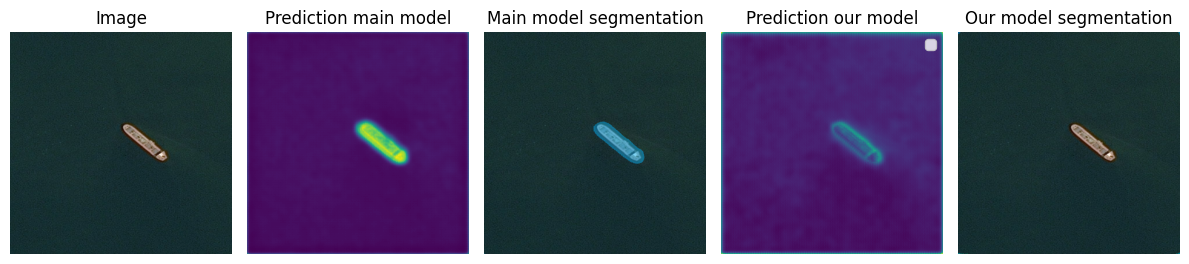

1/1 [==============================] - 0s 44ms/step


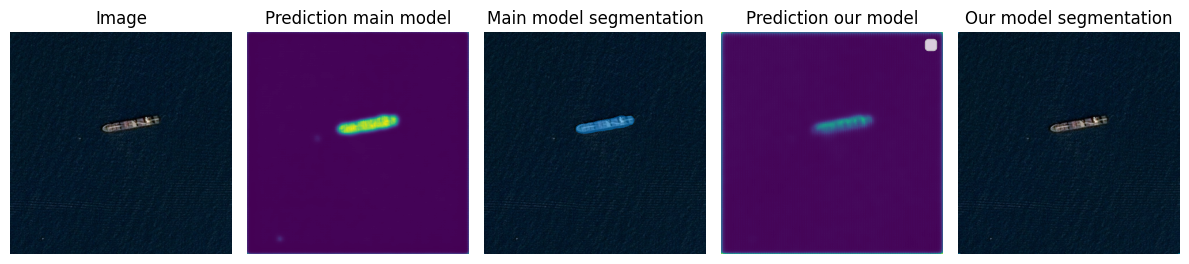

1/1 [==============================] - 0s 45ms/step


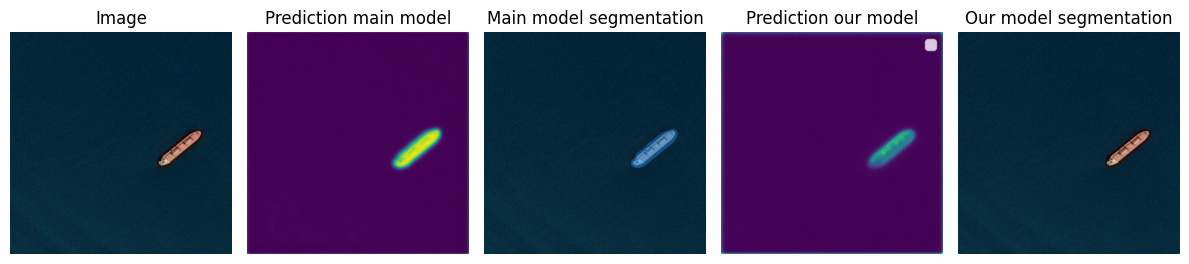

1/1 [==============================] - 0s 49ms/step


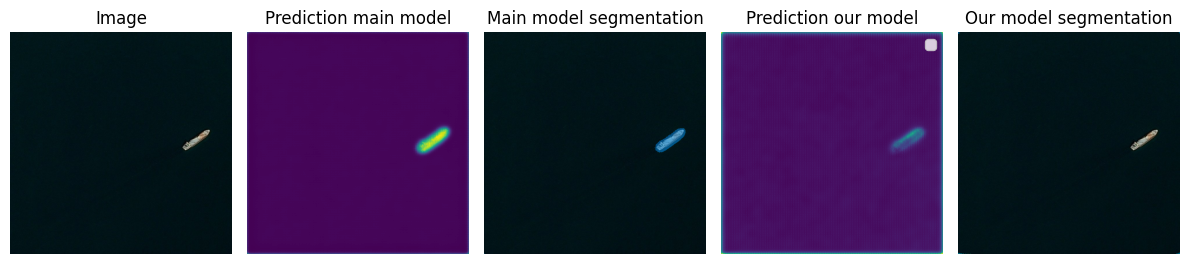

1/1 [==============================] - 0s 47ms/step


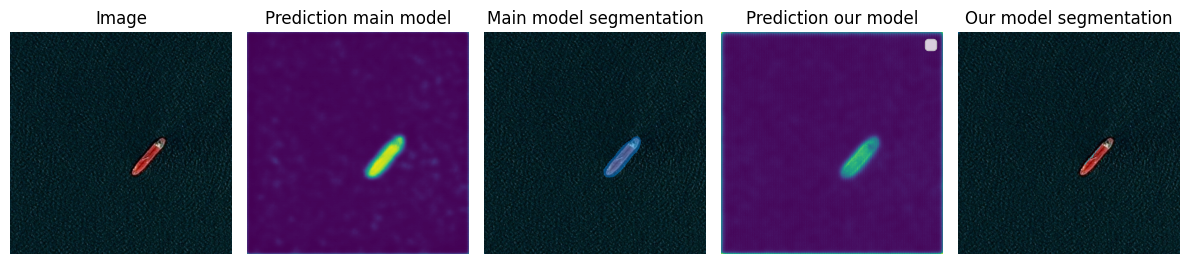

1/1 [==============================] - 0s 47ms/step


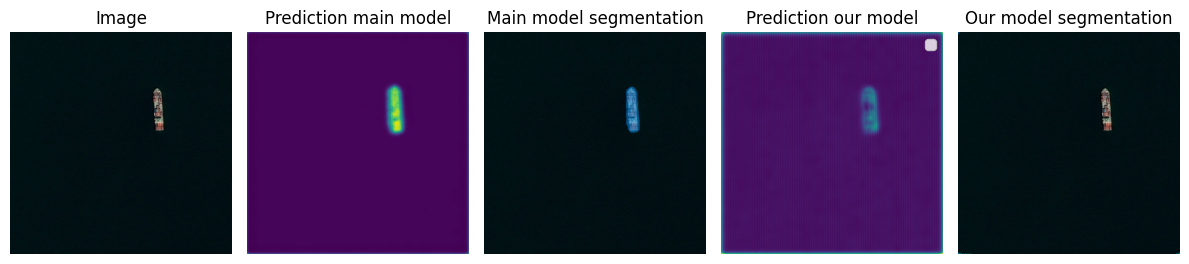

1/1 [==============================] - 0s 48ms/step


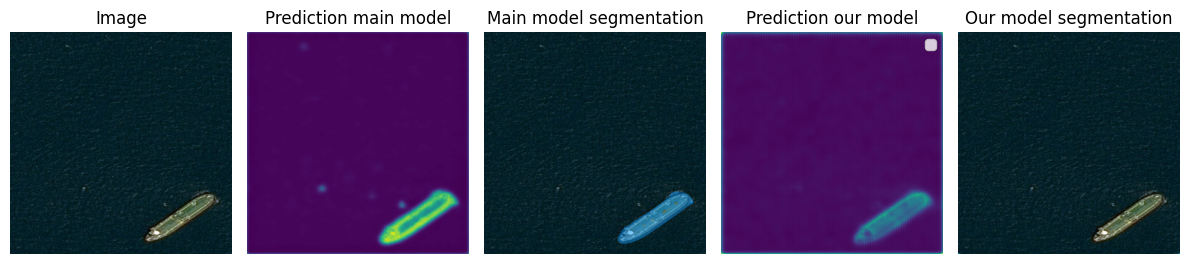

1/1 [==============================] - 0s 43ms/step


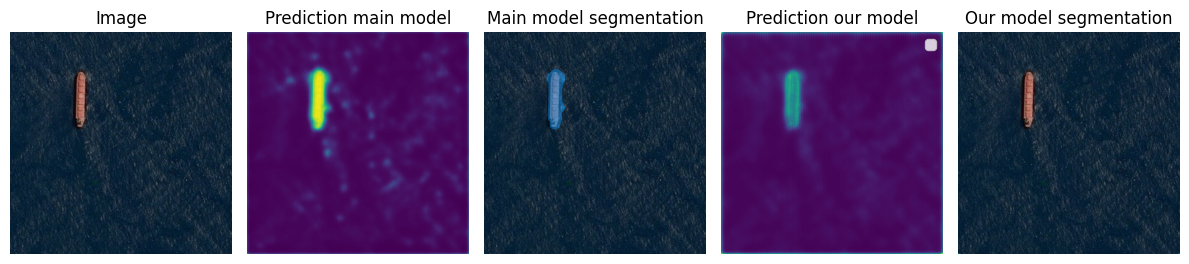

1/1 [==============================] - 0s 43ms/step


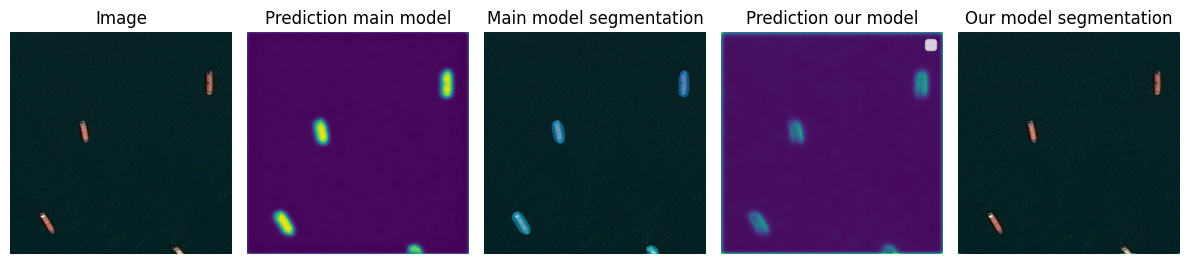

1/1 [==============================] - 0s 42ms/step


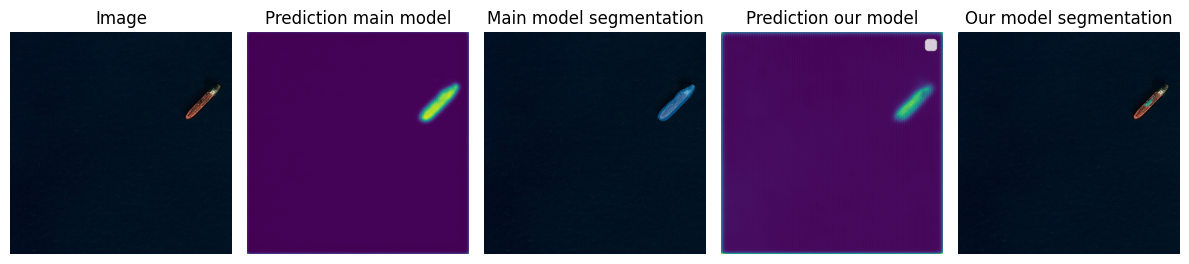

1/1 [==============================] - 0s 42ms/step


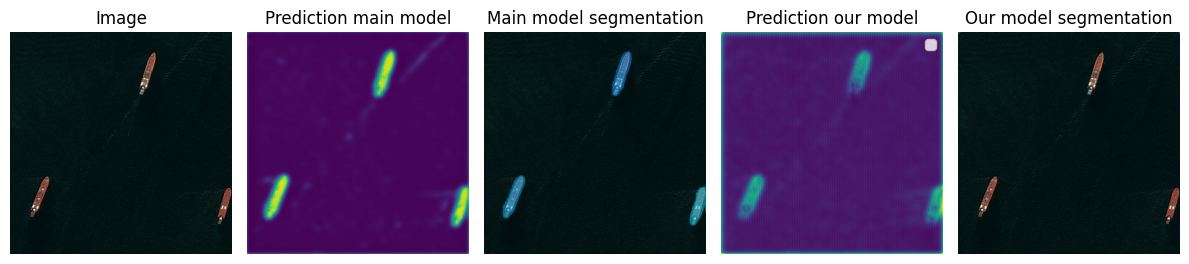

1/1 [==============================] - 0s 46ms/step


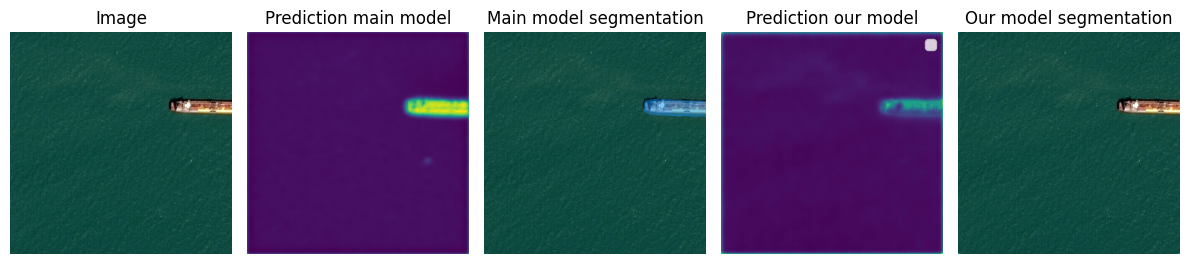

1/1 [==============================] - 0s 49ms/step


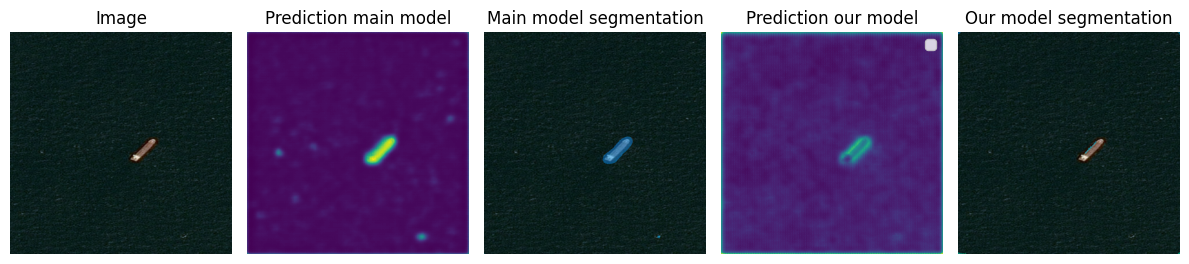

1/1 [==============================] - 0s 49ms/step


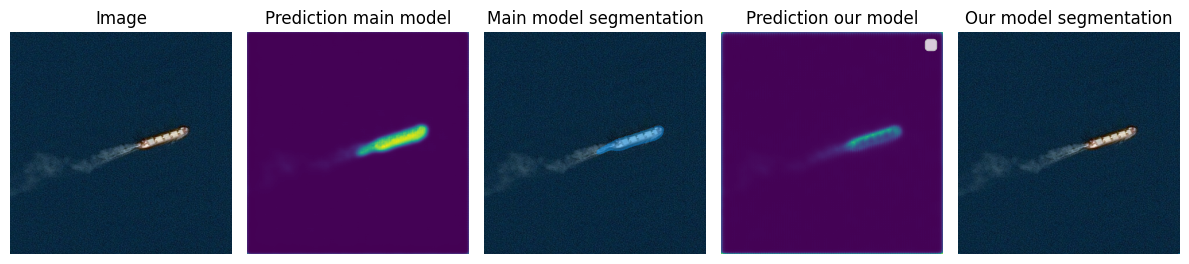

1/1 [==============================] - 0s 47ms/step


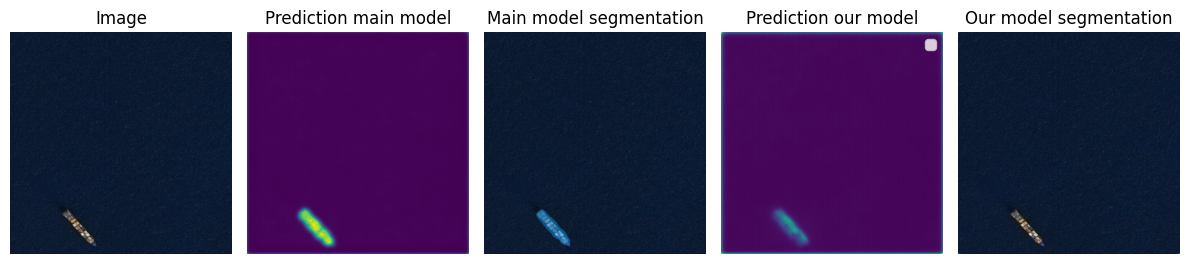

1/1 [==============================] - 0s 48ms/step


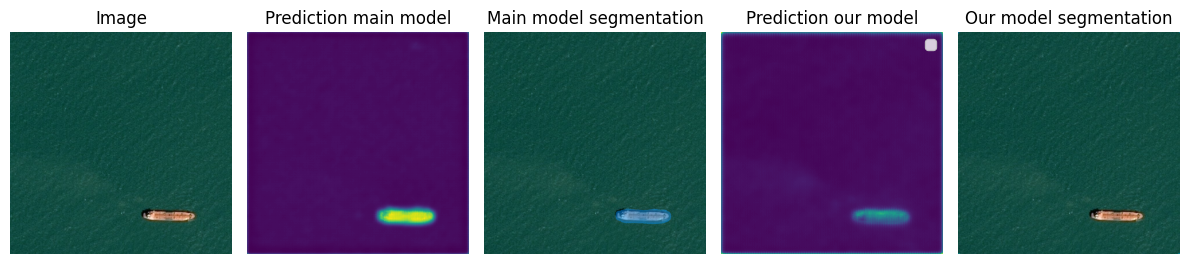

In [31]:
rows = 1
columns = 2
for i in range(len(images)):
    img, pred_main = gen_pred(images[i], main_model)
    segmented_img_main = segmentation(img, pred_main)

    img, pred_our = gen_pred(images[i], our_model)
    segmented_img_our = segmentation(img, pred_our)

    fig = plt.figure(figsize=(12, 9))

    rows = 1
    columns = 5

    fig.add_subplot(rows, columns, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Image")

    fig.add_subplot(rows, columns, 2)
    plt.imshow(pred_main)
    plt.axis('off')
    plt.title("Prediction main model")

    fig.add_subplot(rows, columns, 3)
    plt.imshow(segmented_img_main)
    plt.axis('off')
    plt.title("Main model segmentation")

    fig.add_subplot(rows, columns, 4)
    plt.imshow(pred_our)
    plt.axis('off')
    plt.title("Prediction our model")

    fig.add_subplot(rows, columns, 5)
    plt.imshow(segmented_img_our)
    plt.axis('off')
    plt.title("Our model segmentation")


    plt.tight_layout()
    plt.show()

# Conclusion
Our model is not working because our training data doesn't contain enough images. Due to fact that our model has less images it also means that our model has lower prediction accuracy (the lighter prediction model the bigger prediction accuracy level).